# COE782- ML - Lista3 - E1

## Experimento "Polynomial Curve Fitting"
Aluno: Vivian de Carvalho Rodrigues

DRE:125228569  

In [1]:
#Experimento computacional "Polynomial Curve Fiting" do livro Pattern Recognition (Bishop)
#Lista 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

#função exata
x =  np.arange(0., 1., 0.01)     
y_f = np.sin(2*np.pi*x)


#gera dados com ruido
N = 10                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets

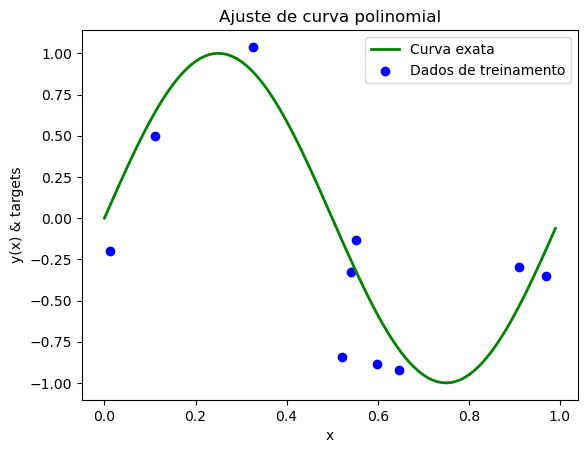

In [2]:
# Plot do problema
plt.plot(x, y_f, color="green", linewidth=2, label = "Curva exata")
plt.scatter(X, t, color="blue", label = "Dados de treinamento")
plt.xlabel("x")
plt.ylabel("y(x) & targets")
plt.legend()
plt.title("Ajuste de curva polinomial")
plt.show()

In [3]:
#Definição da curva polinomial
M = 9                                        #grau do polinomio 
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)


#a) Regressão por mínimos quadrados (LS) 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)
lin_reg.intercept_, lin_reg.coef_

(array([-287.92703562]),
 array([[ 3.00683769e+04, -5.62656672e+05,  4.44733451e+06,
         -1.89573531e+07,  4.80230988e+07, -7.45817716e+07,
          6.97233151e+07, -3.60121948e+07,  7.89089627e+06]]))

In [4]:
#Guarda vetor wls com os coeficientes w incluindo w0
wls = []                                                    #gera lista de coeficientes vazio
wls += [lin_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wls += [lin_reg.intercept_[0]]                              #w0
print(wls)

[30068.376878534516, -562656.6716775026, 4447334.508521401, -18957353.07751296, 48023098.7646944, -74581771.57159613, 69723315.05752885, -36012194.8300796, 7890896.273549521, -287.9270356169768]


In [5]:
# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

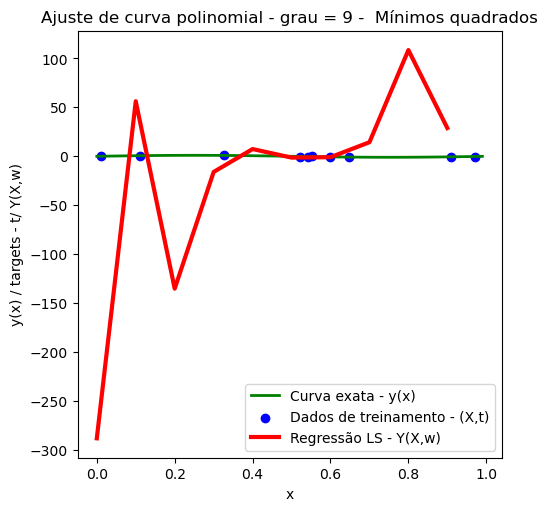

In [6]:
#Plota Gráfico
fig, axs = plt.subplots(1, 1, figsize=(5, 5), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Y, color="red", linewidth=3, label = "Regressão LS - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " + str(M) + " -  Mínimos quadrados") 
plt.show()

In [7]:
#b) Regressão Ridge (Tikhonov regularization)  

freg = 1e-5              #fator de regularização - lambda do Bishop

rig_reg = Ridge(alpha=freg, solver="auto")
rig_reg.fit(X_poly, t)
rig_reg.intercept_, rig_reg.coef_

(array([-0.37128611]),
 array([[ 11.03763324, -18.81004818, -16.98260396,  13.40479204,
          19.6978736 ,   9.13263923,  -3.0343918 ,  -8.70204032,
          -6.06429308]]))

In [8]:
#Guarda vetor wrig com os coeficientes w incluindo w0
wrig = []                                                    #gera lista de coeficientes vazio
wrig += [rig_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wrig += [rig_reg.intercept_[0]]                              #w0
print(wrig)

[11.0376332350616, -18.81004817845561, -16.982603963657887, 13.404792037841164, 19.697873603031255, 9.132639228885129, -3.0343918022248855, -8.702040320055266, -6.0642930758983296, -0.3712861094300227]


In [9]:
# Gera o y (x,w) estimado com os parâmetros ajustados
#X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Yrig = rig_reg.predict(poly_features.fit_transform(X_new))

Fator de regularização lambda =  1e-05


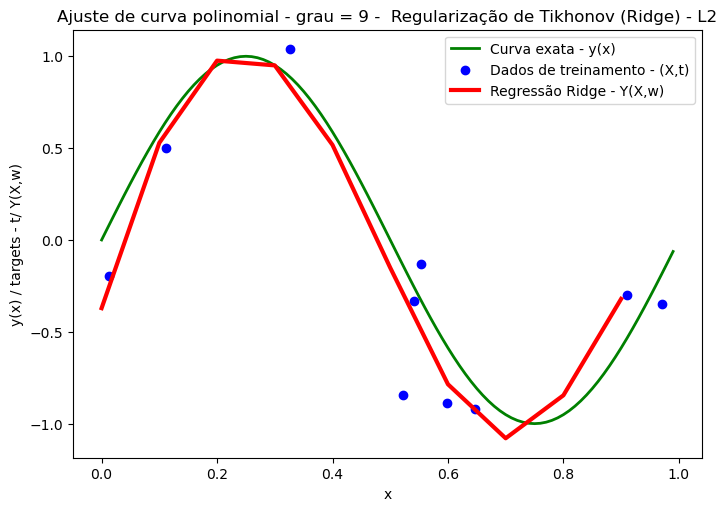

In [10]:
#Plota Gráfico
print('Fator de regularização lambda = ', freg)
fig, axs = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Yrig, color="red", linewidth=3, label = "Regressão Ridge - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " + str(M) + " -  Regularização de Tikhonov (Ridge) - L2") 
plt.show()

In [11]:
#c) Lasso  
#mesmo fator de regularização 

lasfreg = 1e-20

las_reg = Lasso(alpha=lasfreg, max_iter=50000)
las_reg.fit(X_poly, t)
las_reg.intercept_, las_reg.coef_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.535e-01, tolerance: 3.465e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


(array([-0.39126256]),
 array([ 11.53689364, -19.99264936, -20.04227657,  23.02862227,
         16.97428684,   3.80629398,  -3.90921563,  -6.22490861,
         -5.45564237]))

In [12]:
#Guarda vetor wlas com os coeficientes w incluindo w0
wlas = []                                                    #gera lista de coeficientes vazio
wlas += [las_reg.coef_[i] for i in range(M)]                 #armazena coeficientes
wlas += [las_reg.intercept_[0]]                                 #w0
print(wlas)

[11.536893643446923, -19.992649357495754, -20.04227657180715, 23.028622266827103, 16.974286839125387, 3.806293982551454, -3.909215631346607, -6.22490860903729, -5.4556423728282155, -0.3912625559563886]


In [13]:
# Gera o y (x,w) estimado com os parâmetros ajustados
#X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Ylas = las_reg.predict(poly_features.fit_transform(X_new))

Fator de regularização lambda =  1e-20


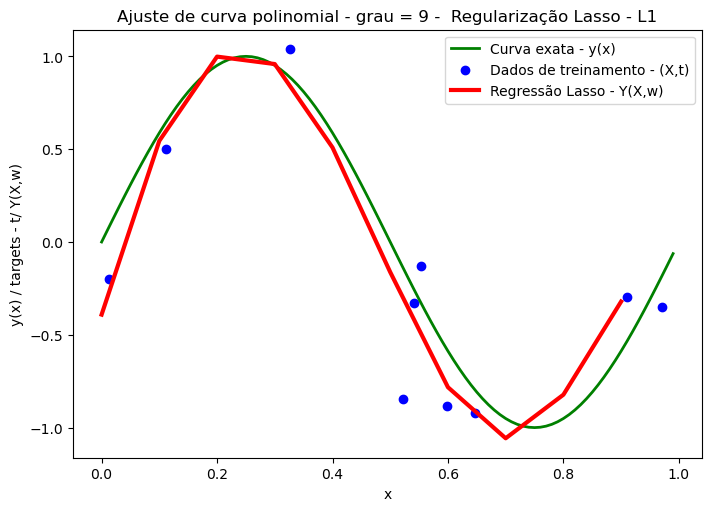

In [14]:
#Plota Gráfico
print('Fator de regularização lambda = ', lasfreg)
fig, axs = plt.subplots(1, 1, figsize=(7, 5), layout='constrained')

axs.plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs.scatter(X, t, color="blue", label = "Dados de treinamento - (X,t)")  
axs.plot(X_new, Ylas, color="red", linewidth=3, label = "Regressão Lasso - Y(X,w)") 
axs.set_xlabel("x")  
axs.set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs.legend()
axs.set_title("Ajuste de curva polinomial - grau = " + str(M) + " -  Regularização Lasso - L1") 
plt.show()

In [15]:
#d) Tabela com os 10 coeficientes w
#dicionario para montagem do dataframe
d = {'wls': wls,'wridge': wrig,'wlasso':wlas}
df_w = pd.DataFrame(data=d)
df_w

,wls,wridge,wlasso
0,3.006838e+04,11.037633,11.536894
1,-5.626567e+05,-18.810048,-19.992649
2,4.447335e+06,-16.982604,-20.042277
3,-1.895735e+07,13.404792,23.028622
4,4.802310e+07,19.697874,16.974287
5,-7.458177e+07,9.132639,3.806294
6,6.972332e+07,-3.034392,-3.909216
7,-3.601219e+07,-8.702040,-6.224909
8,7.890896e+06,-6.064293,-5.455642
9,-2.879270e+02,-0.371286,-0.391263


In [16]:
#d) Gráfico comparativo
#Regressão Ridge (Tikhonov regularization)  

freg = 1e-7              #fator de regularização - lambda do Bishop

rig_reg = Ridge(alpha=freg, solver="auto")
rig_reg.fit(X_poly, t)

#Guarda vetor wrig com os coeficientes w incluindo w0
wrig = []                                                    #gera lista de coeficientes vazio
wrig += [rig_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wrig += [rig_reg.intercept_[0]]                              #w0

#Lasso  
#mesmo fator de regularização 
las_reg = Lasso(alpha=freg, max_iter=50000)
las_reg.fit(X_poly, t)

#Guarda vetor wlas com os coeficientes w incluindo w0
wlas = []                                                    #gera lista de coeficientes vazio
wlas += [las_reg.coef_[i] for i in range(M)]                 #armazena coeficientes
wlas += [las_reg.intercept_[0]]                                 #w0

# Gera o y (x,w) estimado com os parâmetros ajustados
Yrig = rig_reg.predict(poly_features.fit_transform(X_new))   #Ridge
Ylas = las_reg.predict(poly_features.fit_transform(X_new))   #Lasso

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e-01, tolerance: 3.465e-04
  model = cd_fast.enet_coordinate_descent(


In [17]:
d = {'wls': wls,'wridge': wrig,'wlasso':wlas}
df_w = pd.DataFrame(data=d)
df_w

,wls,wridge,wlasso
0,3.006838e+04,5.480856,11.536287
1,-5.626567e+05,31.435111,-20.002244
2,4.447335e+06,-158.429226,-19.990588
3,-1.895735e+07,118.196296,22.968407
4,4.802310e+07,98.183243,16.966695
5,-7.458177e+07,-31.107729,3.779357
6,6.972332e+07,-83.638291,-3.804673
7,-3.601219e+07,-36.623371,-6.252162
8,7.890896e+06,56.392991,-5.479936
9,-2.879270e+02,-0.278636,-0.391195


Fator de regularização lambda =  1e-07


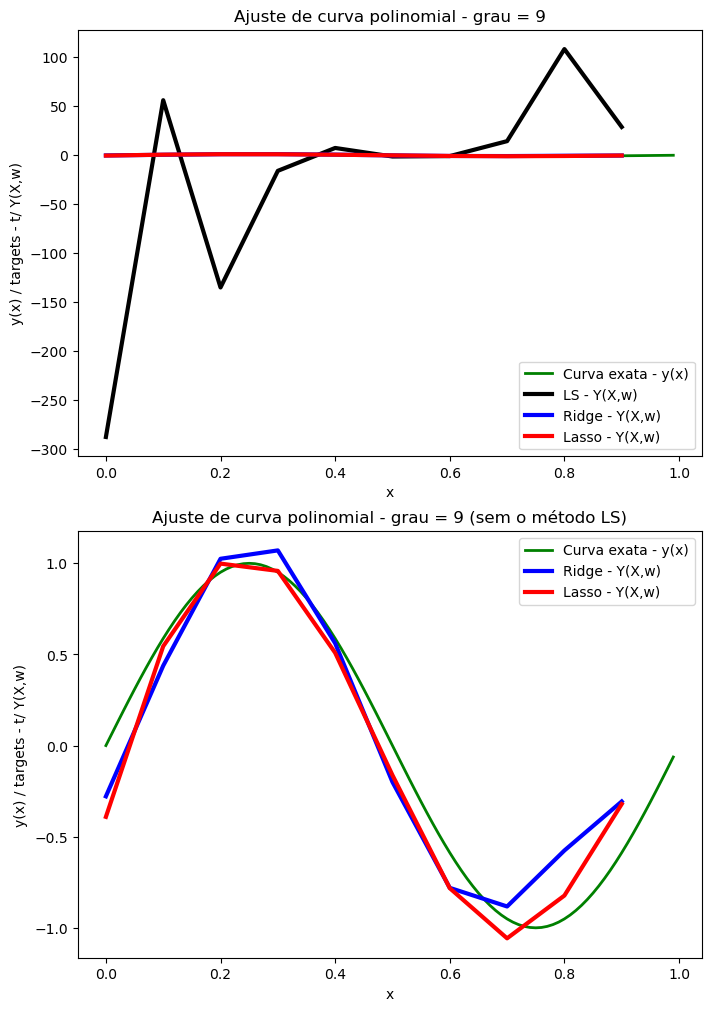

In [18]:
#Plota Gráfico
print('Fator de regularização lambda = ', freg)
fig, axs = plt.subplots(2, 1, figsize=(7, 10), layout='constrained')

axs[0].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[0].plot(X_new, Y, color="black", linewidth=3, label = "LS - Y(X,w)") 
axs[0].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[0].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[0].set_xlabel("x")  
axs[0].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[0].legend()
axs[0].set_title("Ajuste de curva polinomial - grau = " + str(M) ) 

axs[1].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[1].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[1].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[1].set_xlabel("x")  
axs[1].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[1].legend()
axs[1].set_title("Ajuste de curva polinomial - grau = " + str(M) + " (sem o método LS)" ) 


plt.show()

### Mesmo exercício anterior com N = 20

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

#função exata
x =  np.arange(0., 1., 0.01)     
y_f = np.sin(2*np.pi*x)


#gera dados com ruido
N = 20                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets


#Definição da curva polinomial
M = 9                                        #grau do polinomio 
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)


#a) Regressão por mínimos quadrados (LS) 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)

#Guarda vetor wls com os coeficientes w incluindo w0
wls = []                                                    #gera lista de coeficientes vazio
wls += [lin_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wls += [lin_reg.intercept_[0]]                              #w0

# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

#Regressão Ridge (Tikhonov regularization)  

freg = 1e-7              #fator de regularização - lambda do Bishop

rig_reg = Ridge(alpha=freg, solver="auto")
rig_reg.fit(X_poly, t)

#Guarda vetor wrig com os coeficientes w incluindo w0
wrig = []                                                    #gera lista de coeficientes vazio
wrig += [rig_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wrig += [rig_reg.intercept_[0]]                              #w0


#Lasso  
#mesmo fator de regularização 
las_reg = Lasso(alpha=freg, max_iter=50000)
las_reg.fit(X_poly, t)

#Guarda vetor wlas com os coeficientes w incluindo w0
wlas = []                                                    #gera lista de coeficientes vazio
wlas += [las_reg.coef_[i] for i in range(M)]                 #armazena coeficientes
wlas += [las_reg.intercept_[0]]                                 #w0

# Gera o y (x,w) estimado com os parâmetros ajustados
Yrig = rig_reg.predict(poly_features.fit_transform(X_new))   #Ridge
Ylas = las_reg.predict(poly_features.fit_transform(X_new))   #Lasso


d = {'wls': wls,'wridge': wrig,'wlasso':wlas}
df_w = pd.DataFrame(data=d)
df_w

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.039e-01, tolerance: 9.460e-04
  model = cd_fast.enet_coordinate_descent(


,wls,wridge,wlasso
0,-21.879030,1.054794,6.213610
1,365.124710,35.683668,-14.597725
2,-2973.162236,-194.711845,-3.202182
3,15808.857697,299.990591,7.163314
4,-53393.441459,-57.708086,4.165241
5,108332.795402,-220.473442,2.661106
6,-126656.784425,29.029215,2.159389
7,78402.348756,239.929400,0.158650
8,-19864.585162,-132.791963,-4.556177
9,0.891717,0.291676,0.133094


Fator de regularização lambda =  1e-07


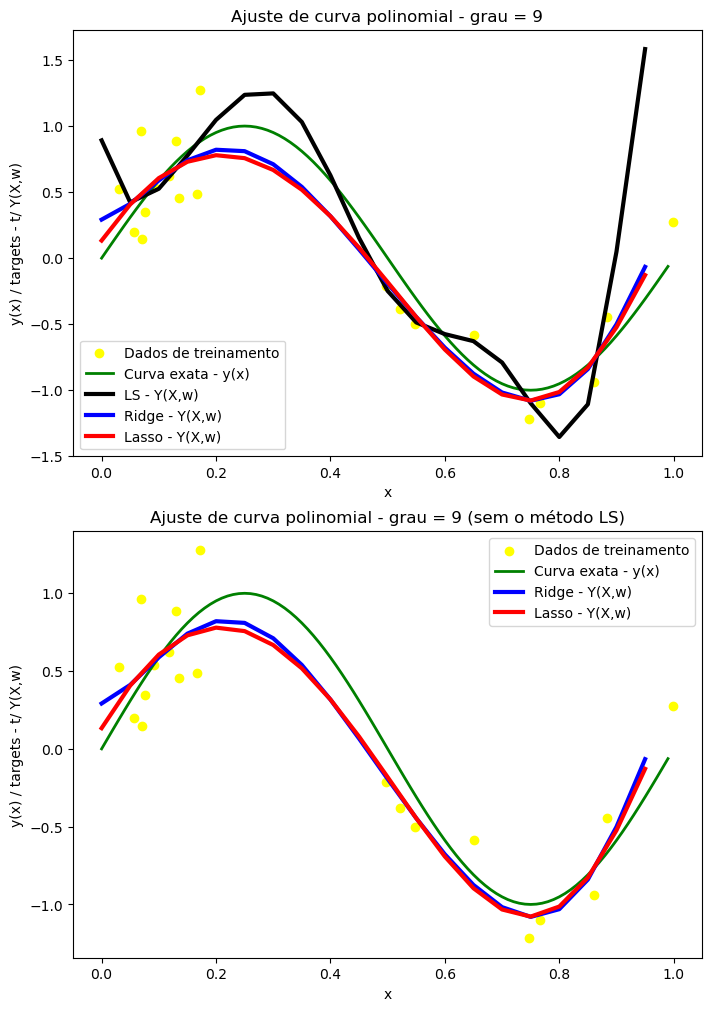

In [20]:
#Plota Gráfico
print('Fator de regularização lambda = ', freg)
fig, axs = plt.subplots(2, 1, figsize=(7, 10), layout='constrained')

axs[0].scatter(X, t, color="yellow", label = "Dados de treinamento")
axs[0].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[0].plot(X_new, Y, color="black", linewidth=3, label = "LS - Y(X,w)") 
axs[0].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[0].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[0].set_xlabel("x")  
axs[0].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[0].legend()
axs[0].set_title("Ajuste de curva polinomial - grau = " + str(M) ) 

axs[1].scatter(X, t, color="yellow", label = "Dados de treinamento")
axs[1].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[1].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[1].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[1].set_xlabel("x")  
axs[1].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[1].legend()
axs[1].set_title("Ajuste de curva polinomial - grau = " + str(M) + " (sem o método LS)" ) 


plt.show()

### Mesmo exercício anterior com N = 50

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

#função exata
x =  np.arange(0., 1., 0.01)     
y_f = np.sin(2*np.pi*x)


#gera dados com ruido
N = 50                                                                       #quantidade de registros dos dados de entrada
X = np.random.rand(N, 1)                                                     #dados de entrada
mu = 0.                                                                      #média
std = 0.3                                                                    #desvio padrão
epsilon = np.random.default_rng().normal(loc=mu, scale=std, size=(N, 1) )    #ruido branco
t = np.sin(2*np.pi*X) + epsilon                                              #targets


#Definição da curva polinomial
M = 9                                        #grau do polinomio 
poly_features = PolynomialFeatures(degree = M, include_bias=False)
X_poly = poly_features.fit_transform(X)


#a) Regressão por mínimos quadrados (LS) 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, t)

#Guarda vetor wls com os coeficientes w incluindo w0
wls = []                                                    #gera lista de coeficientes vazio
wls += [lin_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wls += [lin_reg.intercept_[0]]                              #w0

# Gera o y (x,w) estimado com os parâmetros ajustados
X_new = np.arange(0., 1., 1/N).reshape(N,1)  
Y = lin_reg.predict(poly_features.fit_transform(X_new))

#Regressão Ridge (Tikhonov regularization)  

freg = 1e-7              #fator de regularização - lambda do Bishop

rig_reg = Ridge(alpha=freg, solver="auto")
rig_reg.fit(X_poly, t)

#Guarda vetor wrig com os coeficientes w incluindo w0
wrig = []                                                    #gera lista de coeficientes vazio
wrig += [rig_reg.coef_[0][i] for i in range(M)]              #armazena coeficientes
wrig += [rig_reg.intercept_[0]]                              #w0


#Lasso  
#mesmo fator de regularização 
las_reg = Lasso(alpha=freg, max_iter=50000)
las_reg.fit(X_poly, t)

#Guarda vetor wlas com os coeficientes w incluindo w0
wlas = []                                                    #gera lista de coeficientes vazio
wlas += [las_reg.coef_[i] for i in range(M)]                 #armazena coeficientes
wlas += [las_reg.intercept_[0]]                                 #w0

# Gera o y (x,w) estimado com os parâmetros ajustados
Yrig = rig_reg.predict(poly_features.fit_transform(X_new))   #Ridge
Ylas = las_reg.predict(poly_features.fit_transform(X_new))   #Lasso


d = {'wls': wls,'wridge': wrig,'wlasso':wlas}
df_w = pd.DataFrame(data=d)
df_w

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+00, tolerance: 2.899e-03
  model = cd_fast.enet_coordinate_descent(


,wls,wridge,wlasso
0,-1.961316,7.128093,11.600773
1,93.703282,13.342389,-22.806533
2,-54.889597,-123.939702,-8.248306
3,-3081.470074,173.411472,14.699245
4,15200.346467,-47.501229,11.353421
5,-33381.171727,-52.081972,3.428410
6,38854.391138,33.270691,-1.979334
7,-23283.508658,8.017952,-4.414740
8,5654.427645,-11.725358,-3.608489
9,-0.098153,-0.263137,-0.391978


Fator de regularização lambda =  1e-07


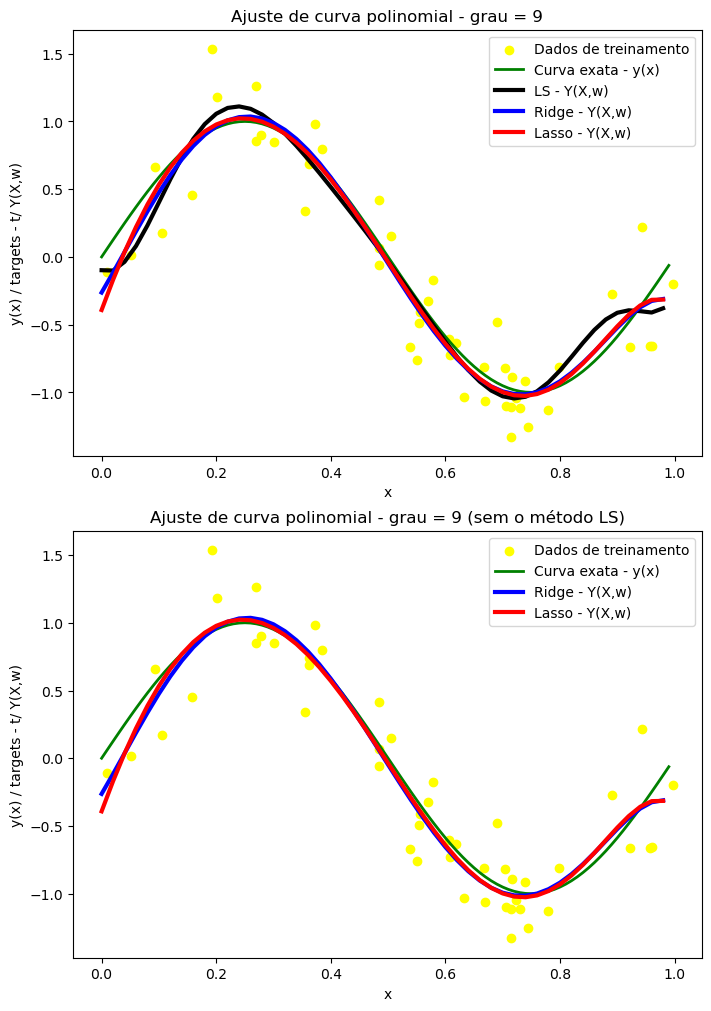

In [22]:
#Plota Gráfico
print('Fator de regularização lambda = ', freg)
fig, axs = plt.subplots(2, 1, figsize=(7, 10), layout='constrained')

axs[0].scatter(X, t, color="yellow", label = "Dados de treinamento")
axs[0].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[0].plot(X_new, Y, color="black", linewidth=3, label = "LS - Y(X,w)") 
axs[0].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[0].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[0].set_xlabel("x")  
axs[0].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[0].legend()
axs[0].set_title("Ajuste de curva polinomial - grau = " + str(M) ) 

axs[1].scatter(X, t, color="yellow", label = "Dados de treinamento")
axs[1].plot(x, y_f, color="green", linewidth=2, label = "Curva exata - y(x)")  
axs[1].plot(X_new, Yrig, color="blue", linewidth=3, label = "Ridge - Y(X,w)")
axs[1].plot(X_new, Ylas, color="red", linewidth=3, label = "Lasso - Y(X,w)") 
axs[1].set_xlabel("x")  
axs[1].set_ylabel("y(x) / targets - t/ Y(X,w)")  
axs[1].legend()
axs[1].set_title("Ajuste de curva polinomial - grau = " + str(M) + " (sem o método LS)" ) 


plt.show()